## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

## Load Dataset

In [ ]:
boston = pd.read_csv('/content/housing.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
boston.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
boston.duplicated().sum()

0

## Data Preprocessing (20 point)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dan tidak melakukan reduksi dimensi untuk dibandingkan hasilnya bagus mana menggunakan PCA vs Non-PCA vs FA (optional)

In [ ]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values
boston_column = boston.drop('MEDV', axis=1).columns

In [ ]:
boston_column

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
new_boston = pd.DataFrame(data = X_std, columns = boston_column)
new_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### PCA Prosess (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Standarisasi fitur
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=13)
pca.fit(X_scaled)
pcs = pca.transform(X_scaled)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7', 'pc8','pc9','pc10','pc11','pc12','pc13'])
pdf['MEDV'] = y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,-0.423070,0.315338,0.318641,-0.295832,-0.424937,-0.640206,0.033000,0.019440,0.365975,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,0.195876,-0.264223,0.553861,0.223670,-0.166962,-0.084236,0.640810,-0.125797,-0.070719,21.6
2,-2.074598,0.599639,0.167122,-0.739204,0.934534,-0.448095,0.484560,-0.105166,0.069775,0.180380,0.487557,0.133327,-0.014022,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,1.104956,-0.664649,0.622641,-0.255941,-0.342246,-0.045901,0.360209,0.508678,0.007847,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,1.065924,-0.617047,0.705086,0.134524,-0.417668,0.140880,0.395150,0.497732,0.014274,36.2


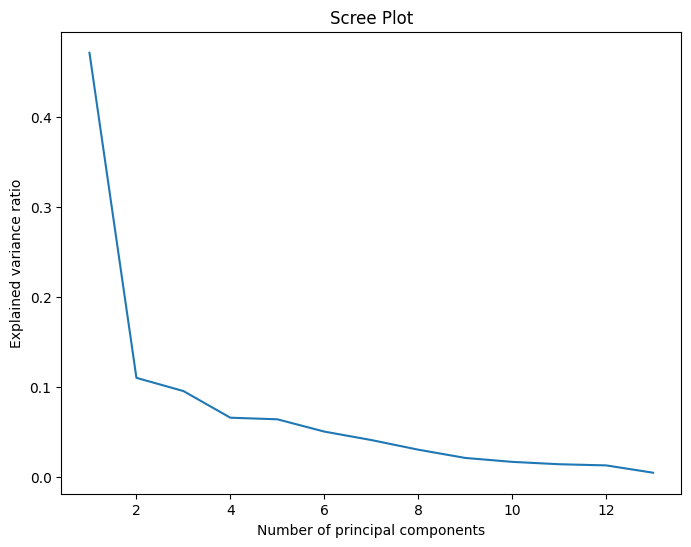

In [ ]:
# Analisis Scree Plot
pca = PCA()
pca.fit(X_scaled)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Tentukan jumlah komponen utama
n_components = next(x[0] for x in enumerate(np.cumsum(pca.explained_variance_ratio_)) if x[1] >= 0.95) + 1
print(f"Jumlah komponen utama yang mempertahankan 95% varians: {n_components}")

Jumlah komponen utama yang mempertahankan 95% varians: 9


In [ ]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823
 0.06363502]
Explained variance ratio: [0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]


<BarContainer object of 13 artists>

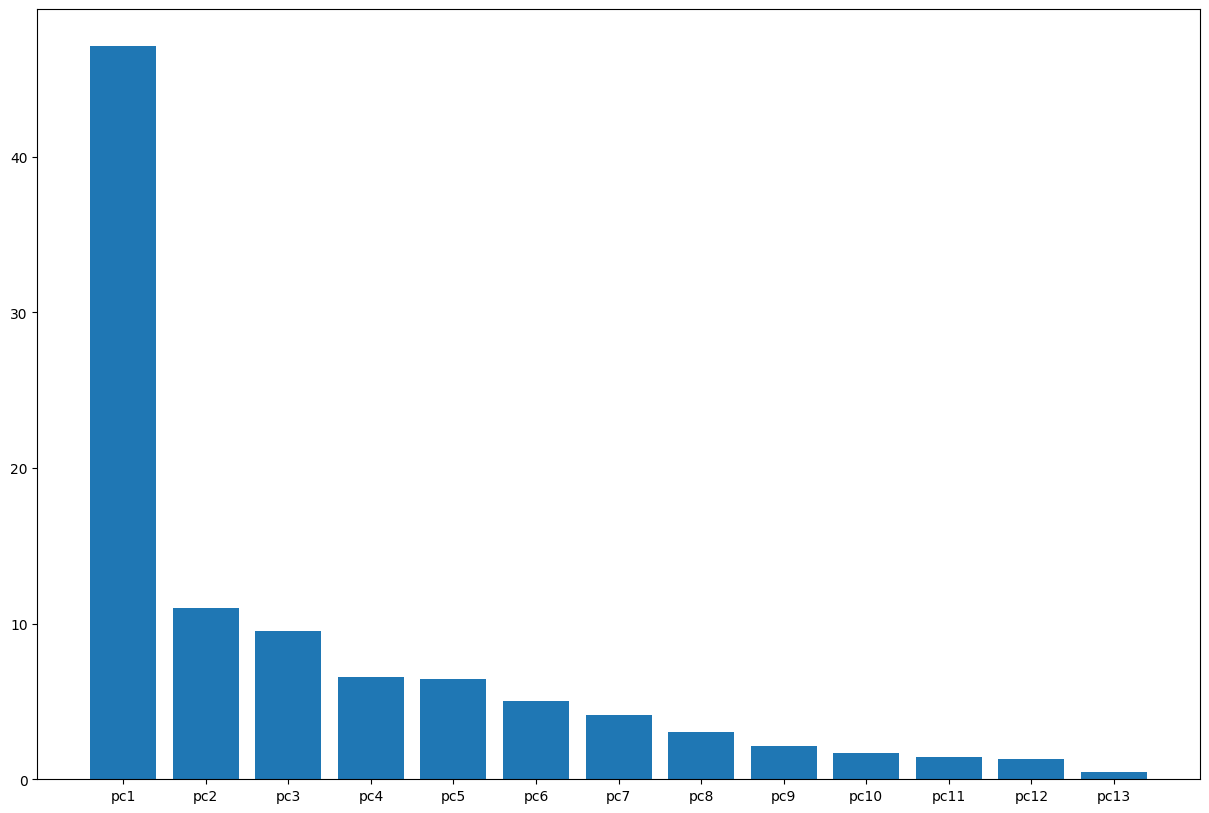

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7', 'pc8','pc9','pc10','pc11','pc12','pc13'], pca.explained_variance_ratio_ * 100)

In [ ]:
pca = PCA(n_components=9)
pca.fit(X_scaled)
pcs = pca.transform(X_scaled)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7', 'pc8','pc9'])
X_std_pca['MEDV'] = y
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,-0.423070,0.315338,0.318641,-0.295832,-0.424937,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,0.195876,-0.264223,0.553861,0.223670,-0.166962,21.6
2,-2.074598,0.599639,0.167122,-0.739204,0.934534,-0.448095,0.484560,-0.105166,0.069775,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,1.104956,-0.664649,0.622641,-0.255941,-0.342246,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,1.065924,-0.617047,0.705086,0.134524,-0.417668,36.2


### FA Process

In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [ ]:
chi_square, p_value = calculate_bartlett_sphericity(X)
print(f"Bartlett's Test: Chi-square = {chi_square:.2f}, p-value = {p_value:.3f}")

Bartlett's Test: Chi-square = 4461.64, p-value = 0.000


In [ ]:
kmo_all,kmo_model = calculate_kmo(X)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.8535329794282682


- Bartlett's Test: Jika nilai p_value lebih kecil dari 0.05, maka variabel saling berkorelasi secara signifikan, dan analisis faktor mungkin bisa dilakukan.
- KMO Test: Jika nilai KMO lebih besar dari 0.7, dataset cocok untuk analisis faktor.

In [ ]:
fa = FactorAnalyzer(n_factors=X.shape[1], rotation=None)
fa.fit(X)

FactorAnalyzer(n_factors=13, rotation=None, rotation_kwargs={})

In [ ]:
# Eigenvalues
ev, v = fa.get_eigenvalues()

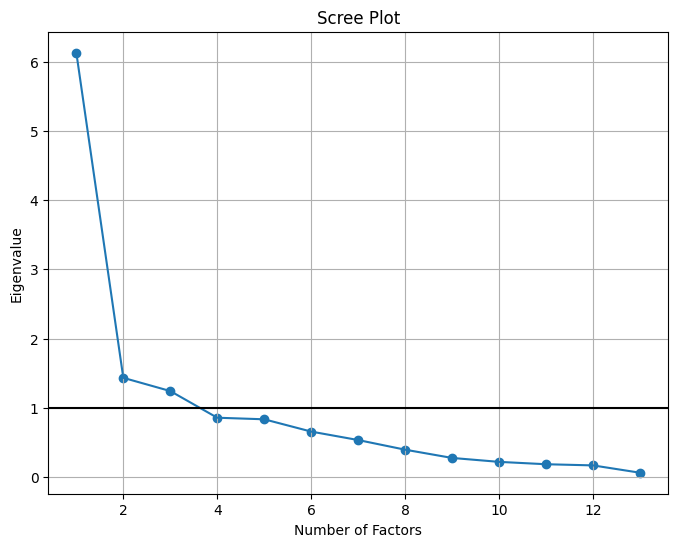

In [ ]:
#Scree Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(1, X.shape[1] + 1), ev)
plt.plot(range(1, X.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')
plt.grid(True)
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=4)
fa.fit(boston)
df_fa = pd.DataFrame(fa.loadings_,index=boston.columns)
df_fa.columns =['faktor 1','faktor 2','faktor 3','faktor 4']
df_fa

,faktor 1,faktor 2,faktor 3,faktor 4
CRIM,0.641997,-0.025075,-0.050821,0.004665
ZN,0.247499,-0.823792,0.079813,-0.347421
INDUS,0.308044,0.549569,-0.136396,0.063556
CHAS,-0.042416,0.212598,0.168501,-0.086065
NOX,0.346738,0.606085,-0.125713,-0.191952
RM,0.178118,-0.083123,0.800377,-0.030021
AGE,0.082803,0.726612,-0.121231,-0.026731
DIS,-0.108150,-0.898045,-0.101462,-0.052105
RAD,1.030467,0.026302,0.277310,0.220120
TAX,0.925953,0.082806,0.117205,0.146464


<Axes: >

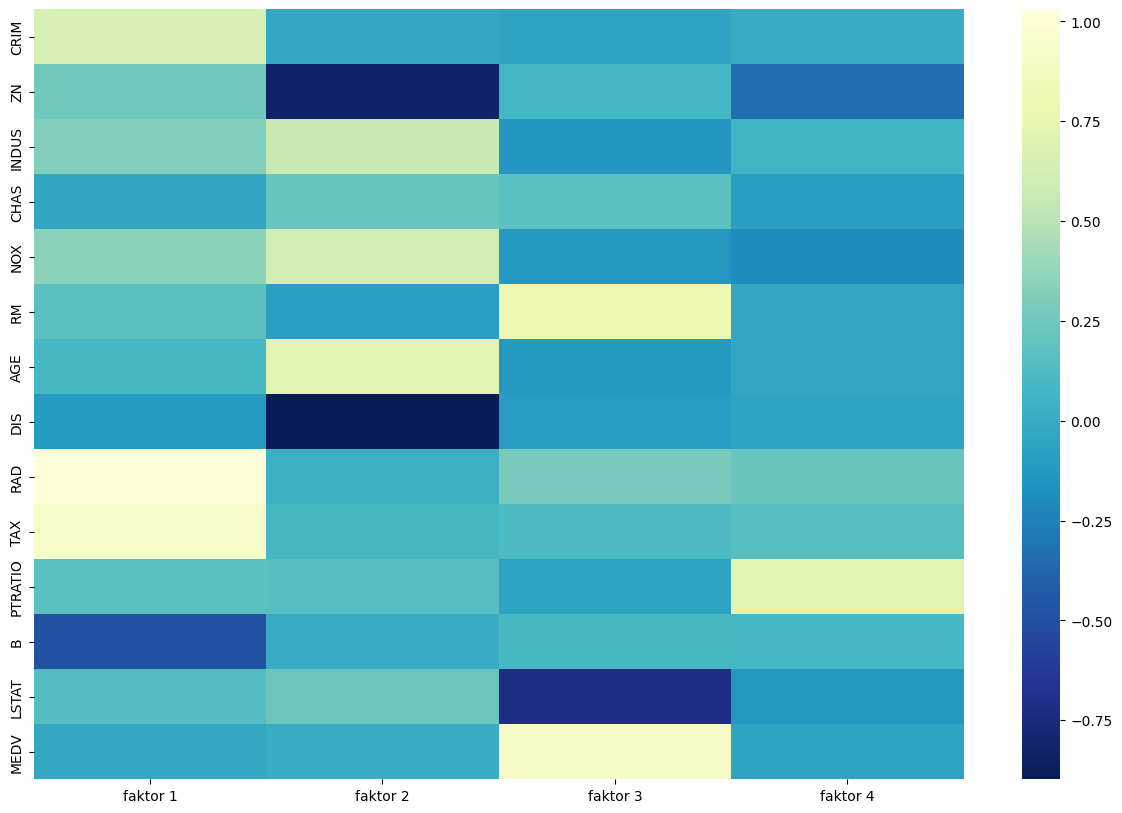

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(df_fa, cmap="YlGnBu_r")

In [ ]:
from sklearn.decomposition import FactorAnalysis

# Terapkan Factor Analysis (misalnya, 2 faktor)
fa = FactorAnalysis(n_components=4, random_state=42)
X_fa_reduced = fa.fit_transform(X_scaled)


## Regression Model (20 point)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score,mean_squared_error, r2_score

#### With PCA

In [ ]:
X_pca = X_std_pca.drop('MEDV', axis=1)
y_pca = X_std_pca['MEDV']

X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

In [ ]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca, Y_train_pca)

LinearRegression()

#### Without PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### FA

In [ ]:
X_fa_train, X_fa_test, y_fa_train, y_fa_test = train_test_split(X_fa_reduced, y, test_size=0.2, random_state=42)

In [ ]:
regressor_fa = LinearRegression()
regressor_fa.fit(X_fa_train, y_fa_train)

LinearRegression()

## Evaluasi (20)

Bandingkan dan jelaskan hasil menggunakan PCA dan tidak menggunakan PCA

#### With PCA

In [ ]:
y_pred = model_pca.predict(X_test_pca)
mse = mean_squared_error(Y_test_pca, y_pred)
r2 = r2_score(Y_test_pca, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

MSE: 29.51
R-squared: 0.60


#### Without PCA

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

MSE: 24.29
R-squared: 0.67


### FA

In [ ]:
y_pred = regressor_fa.predict(X_fa_test)
mse = mean_squared_error(y_fa_test, y_pred)
r2 = r2_score(y_fa_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

MSE: 26.29
R-squared: 0.64


## Interpretasi:

- MSE (Mean Squared Error): Mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. Nilai MSE yang lebih rendah menunjukkan model yang lebih akurat. Dalam kasus ini, model tanpa PCA memiliki MSE terendah (24.29), menunjukkan performa terbaik dalam hal akurasi prediksi.

- R-squared: Menunjukkan proporsi varians dalam variabel dependen yang dijelaskan oleh model. Nilai R-squared yang lebih tinggi menunjukkan model yang lebih baik dalam menjelaskan data. Model tanpa PCA juga memiliki R-squared tertinggi (0.67), menunjukkan bahwa model ini menjelaskan sebagian besar varians dalam data.

## Evaluasi Model:

Berdasarkan metrik MSE dan R-squared, model tanpa PCA tampil paling baik di antara ketiga model. Model dengan PCA memiliki MSE yang lebih tinggi dan R-squared yang lebih rendah, menunjukkan bahwa penerapan PCA dalam kasus ini justru menurunkan performa model. Model dengan FA juga menunjukkan performa yang berada di antara model dengan dan tanpa PCA.

## Kesimpulan:

Penggunaan PCA dalam kasus ini tidak meningkatkan performa model regresi. Bahkan, hal itu menurunkan akurasi prediksi. Model tanpa PCA memberikan hasil terbaik, menunjukkan bahwa reduksi dimensi dengan PCA tidak diperlukan atau bahkan merugikan dalam konteks data ini. Model FA memberikan hasil yang cukup baik, tetapi tidak sebaik model tanpa PCA.